In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import umap
import seaborn as sns
#import hdbscan

In [66]:
from sklearn.cluster import KMeans

In [67]:
%%time
mbh_path = "C:/Users/Owner/Desktop/Projects/Research/Ancient_Text_Authorship_Analysis/Data/Mahabharat_BORI_CE/"

# Specify the directory containing your text files
directory_path = mbh_path +"sections/"

# Initialize an empty list to hold the contents of all files
corpus = []
f_names = []
# Loop through the files in the directory
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            # Read the contents of the file and append to the corpus list
            file_contents = file.read()
            txt_contents = ''.join([i for i in file_contents if not i.isdigit()])
            corpus.append(txt_contents)
    f_names.append(filename)

CPU times: total: 1.72 s
Wall time: 12.4 s


In [68]:
len(corpus)
#print(f_names)

1996

In [69]:
%%time
vect = TfidfVectorizer(min_df=1, token_pattern=r'[^\s]+', lowercase=False)
tfidf = vect.fit_transform(corpus)

CPU times: total: 1.8 s
Wall time: 1.9 s


In [70]:
names = vect.get_feature_names_out()
tfidf_mat = tfidf.toarray()


In [71]:
tfidf_df = pd.DataFrame(data = tfidf_mat, columns = names)
len(names)

223504

In [72]:
%%time
tfidf_df["section"] = f_names
# Function to extract substring [3:6]
def extract_parva(s):
    return int(s[3:5])
    # Applying the function to create a new column
#tfidf_df['parva'] = tfidf_df['section'].apply(extract_parva)
tfidf_df["MBH_parva"] = tfidf_df['section'].str.extract(r'(.{3})(.{2})')[1]
# Display the DataFrame
print(tfidf_df[["section", "MBH_parva"]].head())

         section MBH_parva
0    MB_01_1.txt        01
1   MB_01_10.txt        01
2  MB_01_100.txt        01
3  MB_01_101.txt        01
4  MB_01_102.txt        01
CPU times: total: 172 ms
Wall time: 212 ms


In [73]:
#names[0:100]

In [74]:
tfidf_df["arjuna"].max()

0.10383877152949224

### Most frequent words

In [75]:
%%time
# Combine the contents of all files into a single text document
combined_corpus = "\n".join(corpus)
c=Counter(combined_corpus.split())
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df.columns = ["word", "count"]
df = df.sort_values(by = "count", ascending = False)


CPU times: total: 797 ms
Wall time: 878 ms


In [76]:
skip_words = ['||', '|', '\\medskip', '\\hrule', '=', 'A']
names = [n for n in names if n not in skip_words]

In [77]:
%%time
tfidf_df = tfidf_df[["section", "MBH_parva"] + names]
print(tfidf_df[["section", "MBH_parva"]].head())

         section MBH_parva
0    MB_01_1.txt        01
1   MB_01_10.txt        01
2  MB_01_100.txt        01
3  MB_01_101.txt        01
4  MB_01_102.txt        01
CPU times: total: 10.7 s
Wall time: 12.8 s


In [78]:
tfidf_mat.shape

(1996, 223504)

In [79]:
sim_mat = (tfidf * tfidf.T).A
print(sim_mat.shape)

(1996, 1996)


In [80]:
sim_df = pd.DataFrame(data = sim_mat, columns = f_names)

In [81]:
sim_df

,MB_01_1.txt,MB_01_10.txt,MB_01_100.txt,MB_01_101.txt,MB_01_102.txt,MB_01_103.txt,MB_01_104.txt,MB_01_105.txt,MB_01_106.txt,MB_01_107.txt,...,MB_16_8.txt,MB_16_9.txt,MB_17_1.txt,MB_17_2.txt,MB_17_3.txt,MB_18_1.txt,MB_18_2.txt,MB_18_3.txt,MB_18_4.txt,MB_18_5.txt
0,1.000000,0.255283,0.384215,0.336664,0.341764,0.316449,0.282797,0.298260,0.312984,0.251538,...,0.417490,0.357395,0.370223,0.309710,0.317122,0.311633,0.391652,0.359039,0.292849,0.403391
1,0.255283,1.000000,0.315390,0.270721,0.280797,0.251466,0.229610,0.242383,0.255655,0.199635,...,0.332711,0.284995,0.296965,0.255143,0.264943,0.251577,0.326279,0.290733,0.231920,0.317752
2,0.384215,0.315390,1.000000,0.439764,0.427460,0.385048,0.371562,0.373415,0.375252,0.314899,...,0.506747,0.437606,0.448034,0.375856,0.397487,0.378170,0.479634,0.440789,0.356261,0.487145
3,0.336664,0.270721,0.439764,1.000000,0.389012,0.331306,0.305235,0.351907,0.333100,0.279269,...,0.448680,0.377380,0.400367,0.337514,0.339719,0.325435,0.417668,0.380186,0.309231,0.422699
4,0.341764,0.280797,0.427460,0.389012,1.000000,0.342164,0.308689,0.336110,0.340996,0.272251,...,0.459356,0.391368,0.410833,0.344499,0.356121,0.340852,0.432230,0.398722,0.321238,0.439182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0.311633,0.251577,0.378170,0.325435,0.340852,0.307057,0.274249,0.284635,0.302975,0.242431,...,0.411641,0.357339,0.376318,0.310765,0.350772,1.000000,0.416290,0.378125,0.299786,0.407588
1992,0.391652,0.326279,0.479634,0.417668,0.432230,0.381253,0.353072,0.364302,0.384585,0.303200,...,0.519801,0.441946,0.479002,0.404432,0.419167,0.416290,1.000000,0.474409,0.373148,0.493909
1993,0.359039,0.290733,0.440789,0.380186,0.398722,0.355745,0.323186,0.338264,0.353373,0.281712,...,0.477807,0.409808,0.450903,0.368740,0.392735,0.378125,0.474409,1.000000,0.354199,0.455947
1994,0.292849,0.231920,0.356261,0.309231,0.321238,0.289441,0.259228,0.281190,0.295207,0.259390,...,0.387446,0.334326,0.348217,0.297666,0.307820,0.299786,0.373148,0.354199,1.000000,0.369892


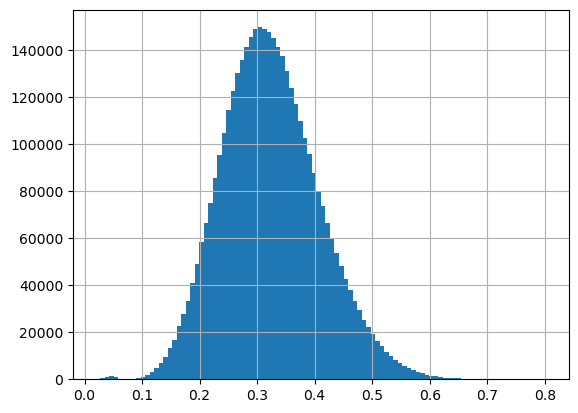

In [82]:
#plt.figure(figsize = (10, 7))
plt.hist(sim_mat[sim_mat<0.9999999], bins = 100)
plt.grid(True)

In [85]:
n_min = 20
freq_words = df[df["count"]>n_min]["word"].to_list()

keep_words = [wrd for wrd in freq_words if wrd not in skip_words]
tfidf_small = tfidf_df[["section", "MBH_parva"] + keep_words]
tfidf_df[["section", "MBH_parva"] + keep_words].head()

,section,MBH_parva,cha,na,sa,uvAcha||,te,tu,hi,me,...,shaknomi,nAsmi,daive,vishrutA,chaiva;,chakratuH,mithunaM,bruvati,krodhaH,mAyA
0,MB_01_1.txt,01,0.066162,0.014537,0.012083,0.003523,0.004374,0.003023,0.006259,0.008942,...,0.0,0.0,0.0,0.0,0.006323,0.0,0.0,0.0,0.0,0.0
1,MB_01_10.txt,01,0.018348,0.010445,0.042442,0.055681,0.011523,0.011945,0.012367,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,MB_01_100.txt,01,0.141518,0.032225,0.085114,0.028632,0.021331,0.000000,0.022893,0.052333,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,MB_01_101.txt,01,0.072027,0.000000,0.064795,0.008096,0.010053,0.052101,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,MB_01_102.txt,01,0.072297,0.027438,0.083620,0.040631,0.030271,0.020918,0.010829,0.037132,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [86]:


sim_mat_small = np.matmul(tfidf_small[keep_words].values , tfidf_small[keep_words].values.T)
print(tfidf_small.shape, sim_mat_small.shape )

(1996, 3294) (1996, 1996)


In [87]:
tfidf_small.head()

,section,MBH_parva,cha,na,sa,uvAcha||,te,tu,hi,me,...,shaknomi,nAsmi,daive,vishrutA,chaiva;,chakratuH,mithunaM,bruvati,krodhaH,mAyA
0,MB_01_1.txt,01,0.066162,0.014537,0.012083,0.003523,0.004374,0.003023,0.006259,0.008942,...,0.0,0.0,0.0,0.0,0.006323,0.0,0.0,0.0,0.0,0.0
1,MB_01_10.txt,01,0.018348,0.010445,0.042442,0.055681,0.011523,0.011945,0.012367,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,MB_01_100.txt,01,0.141518,0.032225,0.085114,0.028632,0.021331,0.000000,0.022893,0.052333,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,MB_01_101.txt,01,0.072027,0.000000,0.064795,0.008096,0.010053,0.052101,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,MB_01_102.txt,01,0.072297,0.027438,0.083620,0.040631,0.030271,0.020918,0.010829,0.037132,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


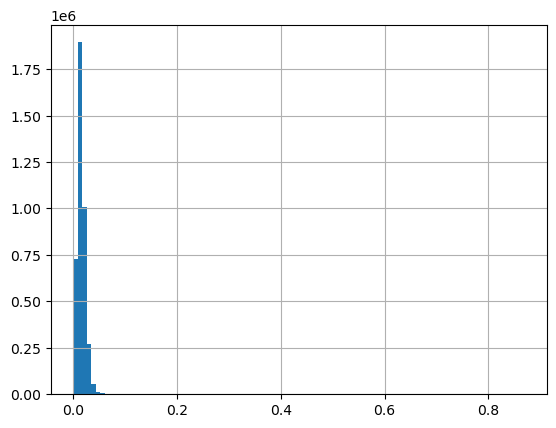

In [88]:
#plt.figure(figsize = (10, 7))
plt.hist(sim_mat_small[sim_mat_small<0.9999999], bins = 100)
plt.grid(True)

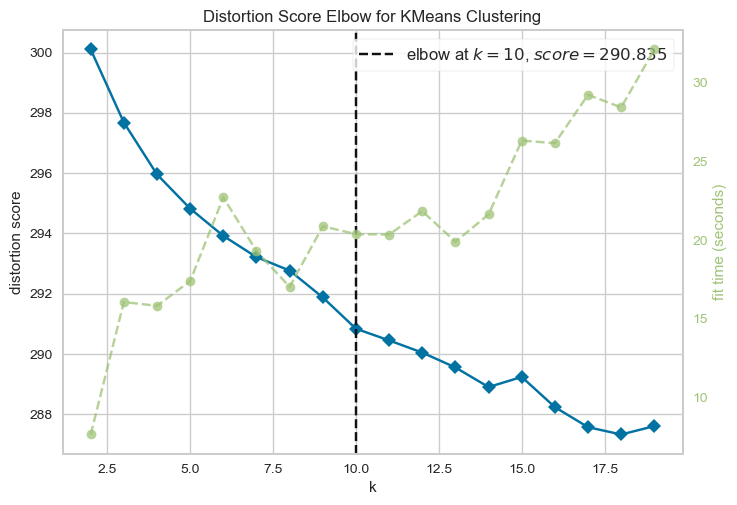

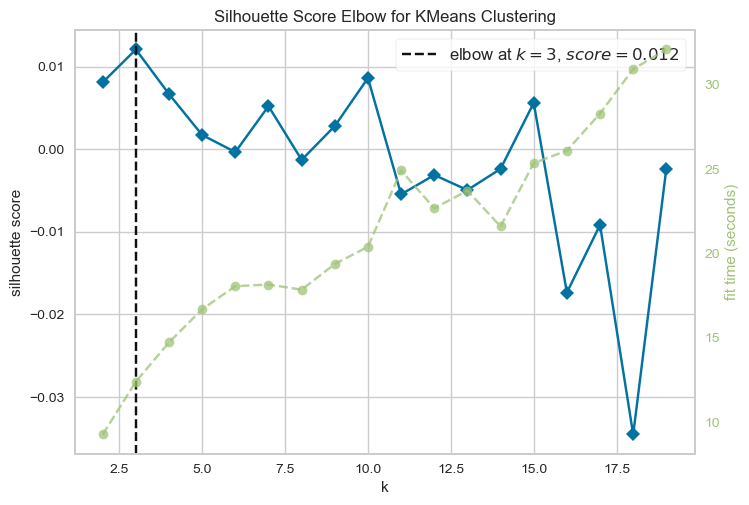

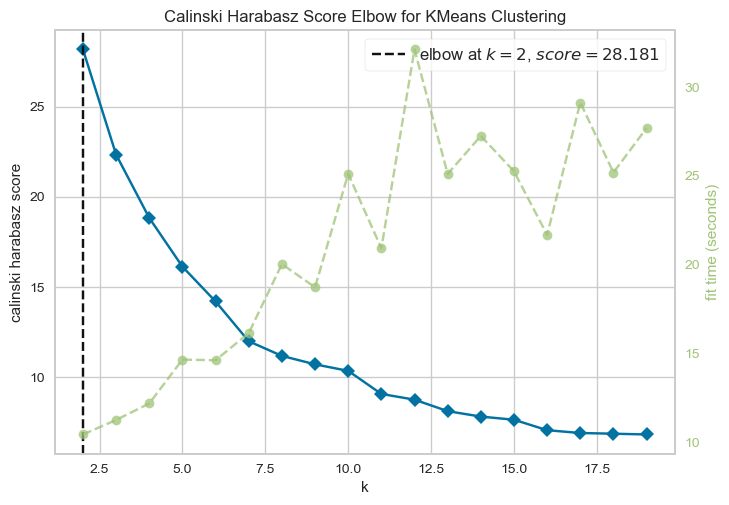

CPU times: total: 51min 46s
Wall time: 19min 17s


<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [89]:
%%time
# Elbow Method for K means
# Import ElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init=50)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(tfidf_small[keep_words] )        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(tfidf_small[keep_words])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(tfidf_small[keep_words])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [31]:
# %%time

# # Gap Statistic for K means
# def optimalK(data, nrefs=3, maxClusters=15):
#     """
#     Calculates KMeans optimal K using Gap Statistic 
#     Params:
#         data: ndarry of shape (n_samples, n_features)
#         nrefs: number of sample reference datasets to create
#         maxClusters: Maximum number of clusters to test for
#     Returns: (gaps, optimalK)
#     """
#     gaps = np.zeros((len(range(1, maxClusters)),))
#     resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
#     for gap_index, k in enumerate(range(1, maxClusters)):
# # Holder for reference dispersion results
#         refDisps = np.zeros(nrefs)
# # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
#         for i in range(nrefs):
            
#             # Create new random reference set
#             randomReference = np.random.random_sample(size=data.shape)
            
#             # Fit to it
#             km = KMeans(k)
#             km.fit(randomReference)
            
#             refDisp = km.inertia_
#             refDisps[i] = refDisp
# # Fit cluster to original data and create dispersion
#         km = KMeans(k)
#         km.fit(data)
        
#         origDisp = km.inertia_
# # Calculate gap statistic
#         gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# # Assign this loop's gap statistic to gaps
#         gaps[gap_index] = gap
        
#         resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
#     return (gaps.argmax() + 1, resultsdf)
# score_g, df = optimalK(tfidf_df, nrefs=5, maxClusters=30)
# plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
# plt.xlabel('K');
# plt.ylabel('Gap Statistic');
# plt.title('Gap Statistic vs. K');



C:\Users\Owner\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Owner\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Owner\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_stat

CPU times: total: 1min 3s
Wall time: 1min 1s


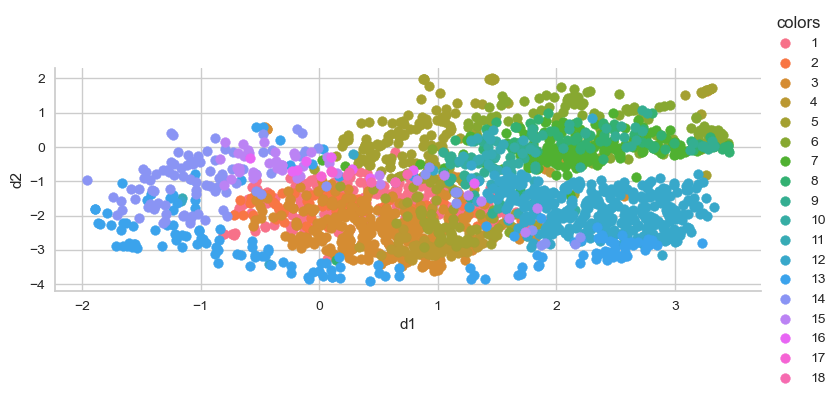

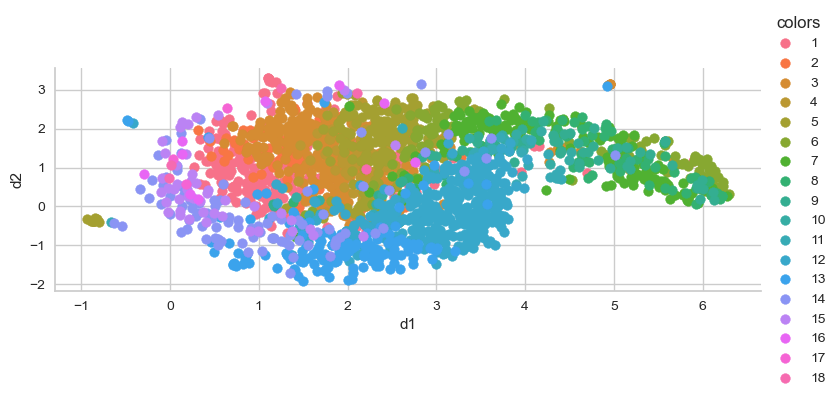

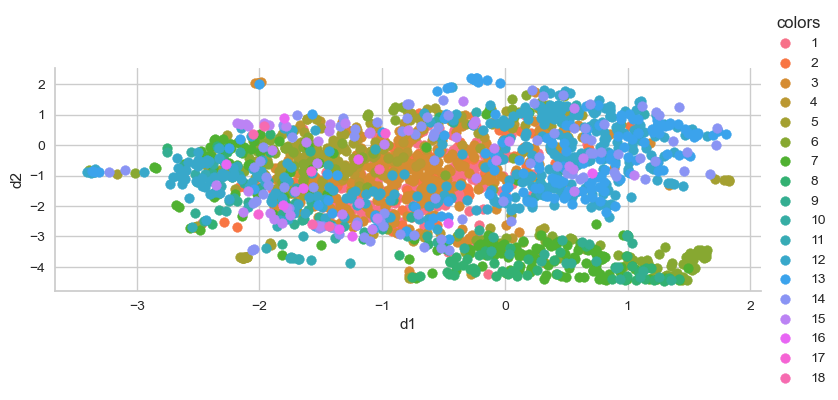

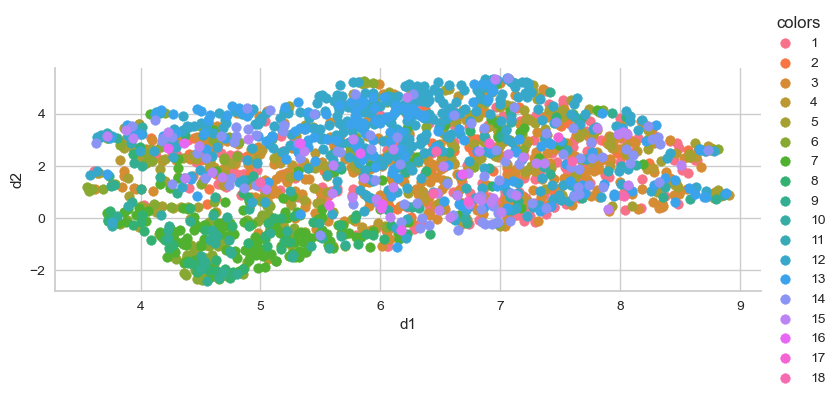

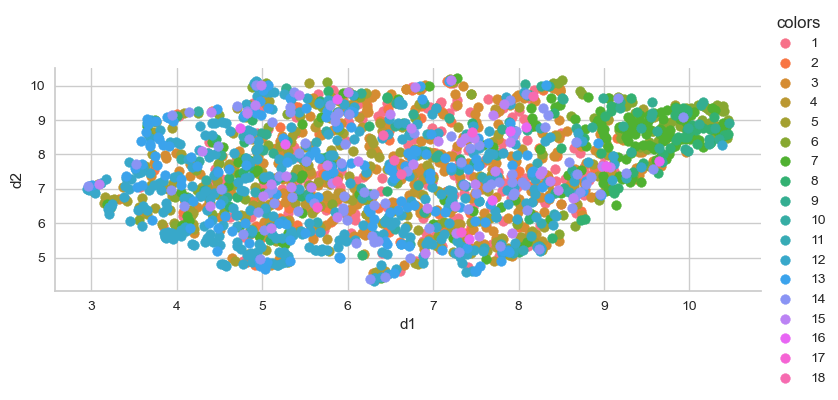

In [103]:
%%time

for n_min in [20, 50, 100, 500, 1000]:
    freq_words = df[df["count"]>n_min]["word"].to_list()
    keep_words = [wrd for wrd in freq_words if wrd not in skip_words]
    tfidf_small = tfidf_df[["section", "MBH_parva"] + keep_words]
    
    standard_embedding = umap.UMAP(random_state=42).fit_transform(tfidf_small[keep_words])
    colors = tfidf_df["MBH_parva"].values.astype(int)
    dfplt = pd.DataFrame(data =standard_embedding, columns = ["d1", "d2"])
    dfplt["colors"] = colors
    fg = sns.FacetGrid(data=dfplt, hue='colors', aspect=2.61)
    fg.map(plt.scatter, "d1", "d2").add_legend()
